#Installing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [ ]:
import zipfile
from google.colab import output
from google.colab import drive

#Reading and exploring the data

In [ ]:

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving madfhantr.csv to madfhantr (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv('/content/madfhantr.csv')

#EDA and Data prepartion

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# importing csv module
import csv
  
# csv file name
filename = "madfhantr.csv"
  
# initializing the titles and rows list
fields = []
rows = []
  
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
      
    # extracting field names through first row
    fields = next(csvreader)
  
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)
  
    # get total number of rows
    print("Total no. of rows: %d"%(csvreader.line_num))
  
# printing the field names
print('Field names are:' + ', '.join(field for field in fields))
  
# printing first 5 rows
print('\nFirst 5 rows are:\n')
for row in rows[:5]:
    # parsing each column of a row
    for col in row:
        print("%10s"%col,end=" "),
    print('\n')

Total no. of rows: 615
Field names are:Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status

First 5 rows are:

  LP001002       Male         No          0   Graduate         No       5849          0                   360          1      Urban          Y 

  LP001003       Male        Yes          1   Graduate         No       4583       1508        128        360          1      Rural          N 

  LP001005       Male        Yes          0   Graduate        Yes       3000          0         66        360          1      Urban          Y 

  LP001006       Male        Yes          0 Not Graduate         No       2583       2358        120        360          1      Urban          Y 

  LP001008       Male         No          0   Graduate         No       6000          0        141        360          1      Urban          Y 



In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['madfhantr.csv']))
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:

  
# importing regex module
import re
    
# making data frame 
data = pd.read_csv("madfhantr.csv") 
    
# removing null values to avoid errors 
data.dropna(inplace = True) 
  
# percentile list
perc =[.20, .40, .60, .80]
  
# list of dtypes to include
include =['object', 'float', 'int']
  
# calling describe method
desc = data.describe(percentiles = perc, include = include)
  
# display
desc

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480.000000,480,480
unique,480,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,394,311,274,383,414,NaN,NaN,NaN,NaN,NaN,191,332
mean,NaN,NaN,NaN,NaN,NaN,NaN,5364.231250,1581.093583,144.735417,342.050000,0.854167,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5668.251251,2617.692267,80.508164,65.212401,0.353307,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,36.000000,0.000000,NaN,NaN
20%,NaN,NaN,NaN,NaN,NaN,NaN,2624.000000,0.000000,95.000000,360.000000,1.000000,NaN,NaN
40%,NaN,NaN,NaN,NaN,NaN,NaN,3417.600000,0.000000,115.600000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3859.000000,1084.500000,128.000000,360.000000,1.000000,NaN,NaN


In [ ]:
# to print the full summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#@title Filling missing values
# missing value percentage is not very much,will replace categorical columns with mode and numerical with mean

miss_ctg_col = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in miss_ctg_col:
    mode_val = df[col].value_counts().index[0]
    df[col].fillna(mode_val,inplace=True)

miss_num_col = ['LoanAmount','Loan_Amount_Term']
for col in miss_num_col:
    df[col].fillna(df[col].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Converting categorical values into numerical

In [ ]:
df.replace({
    'Gender':{'Male':1,'Female':0},
    'Married':{'No':0,'Yes':1},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
    'Education':{'Graduate':1,'Not Graduate':0},
    "Loan_Status":{'N':0,'Y':1}
    },
     inplace=True)

df.replace(to_replace='3+', value=4, inplace=True)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2


In [ ]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

#Training and Splitting of Data set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=3)

In [ ]:
print('X_train length:',len(X_train),'X_test length:',len(X_test))
print("\nX_train dataset")
X_train

X_train length: 521 X_test length: 93

X_train dataset


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
567,1,1,4,1,0,3400,2500.0,123.000000,360.0,0.0,0
33,1,1,0,1,0,3500,1667.0,114.000000,360.0,1.0,1
88,1,0,0,1,0,8566,0.0,210.000000,360.0,1.0,2
530,1,1,0,1,0,1025,5500.0,216.000000,360.0,1.0,0
95,1,0,0,1,0,6782,0.0,146.412162,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
510,1,0,0,0,0,3598,1287.0,100.000000,360.0,1.0,0
94,1,0,0,0,0,3620,0.0,25.000000,120.0,1.0,1
278,1,1,0,1,0,14583,0.0,436.000000,360.0,1.0,1
425,1,1,0,1,0,2666,4300.0,121.000000,360.0,1.0,0


#Training  and testing different models


1) LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(X_test)

accuracy_lr = accuracy_score(Y_test, lr_pred)
auc_roc_lr = roc_auc_score(Y_test, lr_pred)
f1_lr = f1_score(Y_test, lr_pred)
print("Accuracy score of the LR model is: {}".format(accuracy_lr))
print("roc_auc_score of the LR model is: {}".format(auc_roc_lr))
print("F1 score of the LR model is: {}".format(f1_lr))

Accuracy score of the LR model is: 0.8387096774193549
roc_auc_score of the LR model is: 0.7508081896551724
F1 score of the LR model is: 0.8936170212765957


2) DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred = dtc.predict(X_test)

accuracy_dtc = accuracy_score(Y_test, dtc_pred)
auc_roc_dtc = roc_auc_score(Y_test, dtc_pred)
f1_dtc = f1_score(Y_test, dtc_pred)
print("Accuracy score of the DTC model is: {}".format(accuracy_dtc))
print("roc_auc_score of the DTC model is: {}".format(auc_roc_dtc))
print("F1 score of the DTC model is: {}".format(f1_dtc))

Accuracy score of the DTC model is: 0.7204301075268817
roc_auc_score of the DTC model is: 0.6837284482758621
F1 score of the DTC model is: 0.7936507936507936


In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 30,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=30)

In [ ]:

y_pred = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Confusion Matrix: ",
        confusion_matrix(Y_test, y_pred))
      
print ("Accuracy : ",
    accuracy_score(Y_test,y_pred)*100)
      
print("Report : ",
    classification_report(Y_test, y_pred))

Confusion Matrix:  [[15 14]
 [ 4 60]]
Accuracy :  80.64516129032258
Report :                precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.81      0.94      0.87        64

    accuracy                           0.81        93
   macro avg       0.80      0.73      0.75        93
weighted avg       0.80      0.81      0.79        93



#3) RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

accuracy_rfc = accuracy_score(Y_test, rfc_pred)
auc_roc_rfc = roc_auc_score(Y_test, rfc_pred)
f1_rfc = f1_score(Y_test, rfc_pred)
print("Accuracy score of the RFC model is: {}".format(accuracy_rfc))
print("roc_auc_score of the RFC model is: {}".format(auc_roc_rfc))
print("F1 score of the RFC model is: {}".format(f1_rfc))

Accuracy score of the RFC model is: 0.7634408602150538
roc_auc_score of the RFC model is: 0.6866918103448276
F1 score of the RFC model is: 0.8382352941176471


3.1) Hyperparameter(s) Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Different parameters in random forest

criterion = ['gini', 'entropy']        # what criteria to consider

n_estimators = [100, 200, 300]       # Number of trees in random forest

max_features = ['auto', 'sqrt']       # Number of features to consider at every split

max_depth = [10, 20]      # Maximum number of levels in tree. Hope you remember linspace function from numpy session

max_depth.append(None)     # also appendin 'None' in max_depth i.e. no maximum depth to be considered.

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}

In [ ]:

gs = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

In [ ]:
 gs.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [ ]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [ ]:

gs.best_score_

0.8061721611721613

In [ ]:
gs.score(X_test, Y_test)

0.7956989247311828

In [ ]:

rfc_new = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=20, max_features='auto')
rfc_new.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [ ]:
rfc_new_pred = rfc_new.predict(X_test)

accuracy_rfc_new = accuracy_score(Y_test, rfc_new_pred)
auc_roc_rfc_new = roc_auc_score(Y_test, rfc_new_pred)
f1_rfc_new = f1_score(Y_test, rfc_new_pred)
print("Accuracy score of the New RFC model is: {}".format(accuracy_rfc_new))
print("roc_auc_score of the New RFC model is: {}".format(auc_roc_rfc_new))
print("F1 score of the New RFC model is: {}".format(f1_rfc_new))

Accuracy score of the New RFC model is: 0.7634408602150538
roc_auc_score of the New RFC model is: 0.6866918103448276
F1 score of the New RFC model is: 0.8382352941176471


**
Feature Selection**


In [ ]:
#1) Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator= rfc_new , step = 1)

fit = rfe.fit(X_train, Y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False  True False False  True  True  True False  True False]
Feature Ranking: [6 4 1 5 7 1 1 1 3 1 2]


In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
2,Dependents,1
5,ApplicantIncome,1
6,CoapplicantIncome,1
7,LoanAmount,1
9,Credit_History,1
10,Property_Area,2
8,Loan_Amount_Term,3
1,Married,4
3,Education,5
0,Gender,6


In [ ]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
rfc_new_rfe_model = rfc_new.fit(X_train_rfe, Y_train)

In [ ]:
# making predictions and evaluating the RFE model
Y_pred_rfe = rfc_new_rfe_model.predict(X_test_rfe)

rfe_ac = accuracy_score(Y_test, Y_pred_rfe)
rfe_roc_auc = roc_auc_score(Y_test, Y_pred_rfe)
rfe_fscore = f1_score(Y_test ,Y_pred_rfe)

print("RFE Model Accuracy:", rfe_ac)
print("RFE Model ROC-AUC Score:", rfe_roc_auc)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model Accuracy: 0.7956989247311828
RFE Model ROC-AUC Score: 0.7007004310344828
RFE Model F1 Score: 0.8652482269503546


#Understanding Distribution of Numerical Variables


In [ ]:
new_train = data.iloc[:614]
new_test = data.iloc[614:]

In [ ]:
new_train["Loan_Status"] = new_train["Loan_Status"].map({'N':0,"Y":1}).astype(int)

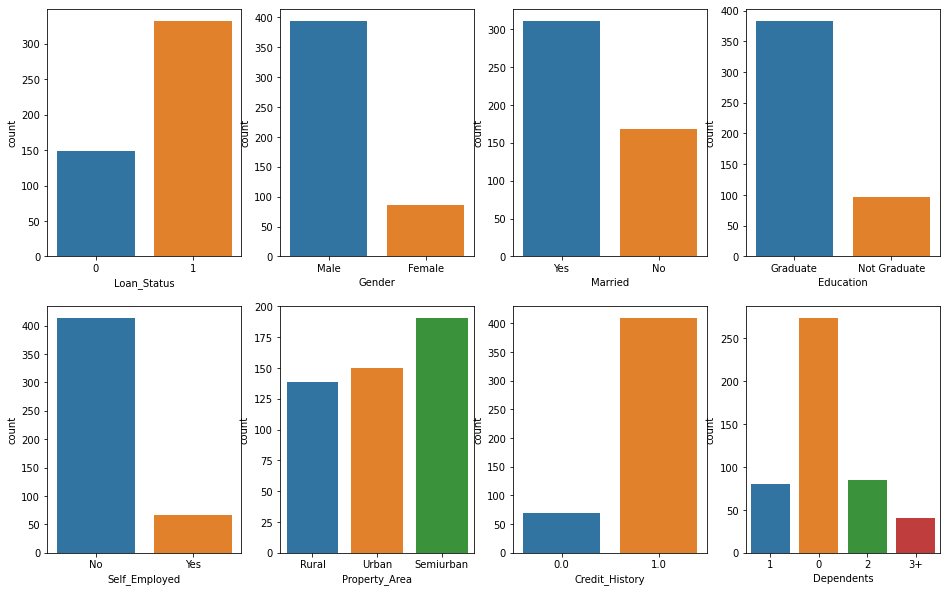

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status' ,data=new_train,ax=ax[0][0])
sns.countplot('Gender' ,data=new_train,ax=ax[0][1])
sns.countplot('Married' ,data=new_train,ax=ax[0][2])
sns.countplot('Education' ,data=new_train,ax=ax[0][3])
sns.countplot('Self_Employed' ,data=new_train,ax=ax[1][0])
sns.countplot('Property_Area' ,data=new_train,ax=ax[1][1])
sns.countplot('Credit_History' ,data=new_train,ax=ax[1][2])
sns.countplot('Dependents' ,data=new_train,ax=ax[1][3])

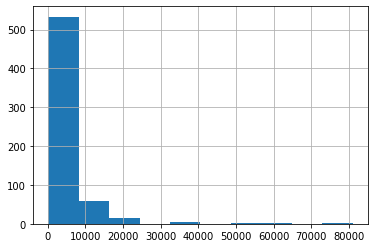

In [ ]:
df['ApplicantIncome'].hist()

In [ ]:
# Box Plot for variable ApplicantIncome of training data set

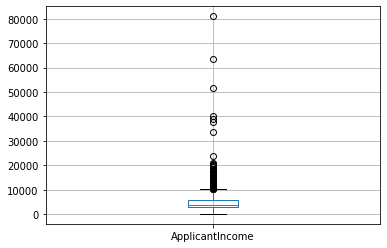

In [ ]:
df.boxplot(column='ApplicantIncome')

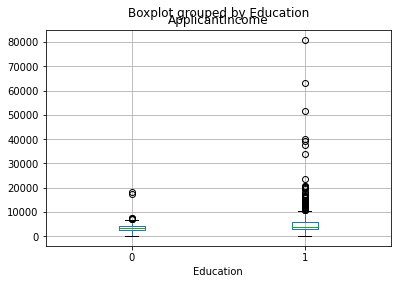

In [ ]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

df.boxplot(column='ApplicantIncome', by = 'Education')

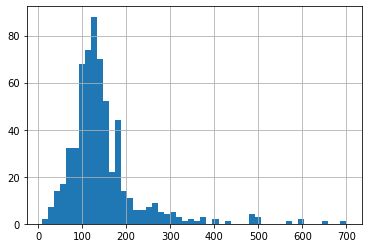

In [ ]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)

In [ ]:

# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')